<a href="https://colab.research.google.com/github/EVELIN0810/SenalesySistemas/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PARCIAL 2 SyS
  Evelin Mayerlin Giraldo Obando

## Punto 1 - Funci√≥n de Transferencia del Sistema Masa-Resorte-Amortiguador

Se analiza un sistema mec√°nico conformado por una **masa (m)**, un **resorte (k)** y un **amortiguador viscoso (c)**. Este sistema se ve sometido a una fuerza externa $ F_E(t) $, y su desplazamiento es denotado por $ y(t) $.

###  Ecuaci√≥n del sistema (modelo mec√°nico)

Aplicando la Segunda Ley de Newton al sistema, se obtiene:

$
F_E(t) = m\ddot{y}(t) + c\dot{y}(t) + ky(t)
$

Donde:
- $ m $: masa (kg)
- $ c $: coeficiente de amortiguamiento (N¬∑s/m)
- $ k $: constante del resorte (N/m)
- $ y(t) $: desplazamiento de la masa (m)
- $ F_E(t) $: fuerza aplicada (N)

### Transformada de Laplace

Asumiendo **condiciones iniciales cero**, la ecuaci√≥n se transforma al dominio de Laplace:

$
m s^2 Y(s) + c s Y(s) + k Y(s) = F_E(s)
$

Factorizando $ Y(s) $:

$
Y(s)(ms^2 + cs + k) = F_E(s)
$

###  Funci√≥n de Transferencia

La funci√≥n de transferencia del sistema es:

$
G(s) = \frac{Y(s)}{F_E(s)} = \frac{1}{ms^2 + cs + k}
$

Esta funci√≥n describe c√≥mo responde el desplazamiento $ y(t) $ ante una fuerza externa $ F_E(t) $.




Este punto presenta la simulaci√≥n de sistemas din√°micos de segundo orden. Se analizan:

- Respuestas temporales: escal√≥n, impulso y rampa.
- Diagrama de Bode y plano de polos y ceros.
- Par√°metros temporales: sobreimpulso, tiempo de levantamiento, tiempo al pico y tiempo de establecimiento.
- Modelos f√≠sicos: masa-resorte-amortiguador.

Se estudian cuatro tipos de comportamiento del sistema:

1. **Subamortiguado** (Œ∂ < 1)
2. **Sobreamortiguado** (Œ∂ > 1)
3. **Cr√≠ticamente amortiguado** (Œ∂ = 1)
4. **Inestable** (Œ∂ < 0)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step, impulse, lsim, tf2zpk, bode


In [ ]:
def get_response(sys, t, tipo):
    """
    Retorna la respuesta del sistema 'sys' seg√∫n el tipo de entrada:
    - 'Escal√≥n': respuesta al escal√≥n unitario.
    - 'Impulso': respuesta al impulso unitario.
    - 'Rampa': respuesta a una rampa unitaria (u(t) = t).

    Par√°metros:
    - sys: sistema din√°mico.
    - t: vector de tiempo.
    - tipo: tipo de entrada ('Escal√≥n', 'Impulso', 'Rampa').

    Retorna:
    - t, y: tiempo y respuesta del sistema.
    """
    if tipo == "Escal√≥n":
        return step(sys, T=t)
    elif tipo == "Impulso":
        return impulse(sys, T=t)
    elif tipo == "Rampa":
        u = t
        _, y, _ = lsim(sys, U=u, T=t)
        return t, y


def calc_parametros(t, y):
    """
    Calcula par√°metros t√≠picos de respuesta:
    - tr: tiempo de subida (10% a 90%).
    - Mp: sobrepaso m√°ximo (%).
    - tp: tiempo al pico.
    - ts: tiempo de establecimiento (¬±2%).

    Retorna:
    - tr, Mp, tp, ts
    """
    try:
        tr = t[np.where(y >= 0.9)[0][0]] - t[np.where(y >= 0.1)[0][0]]
    except:
        tr = np.nan
    try:
        ts = t[np.where(np.abs(y - 1) < 0.02)[0][0]]
    except:
        ts = np.nan
    tp = t[np.argmax(y)]
    Mp = (np.max(y) - 1) * 100
    return tr, Mp, tp, ts



 Tipo: Subamortiguada | Œ∂ = 0.5


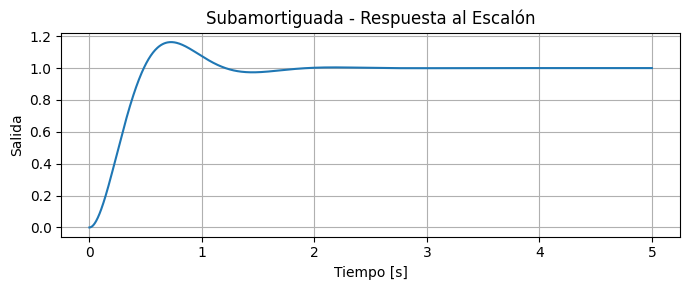

- tr: 0.325 s | Mp: 16.30% | tp: 0.726 s | ts: 0.475 s


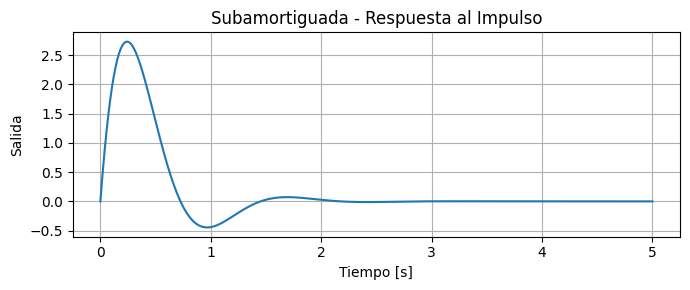

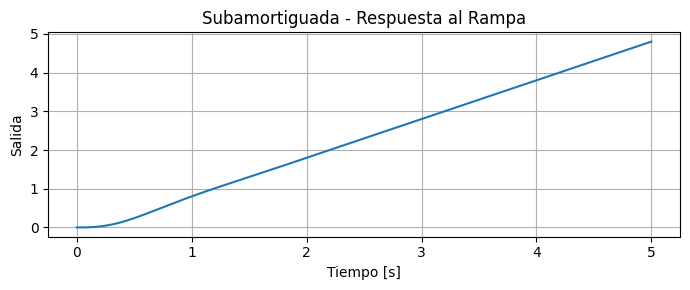


 Tipo: Amortiguamiento cr√≠tico | Œ∂ = 1.0


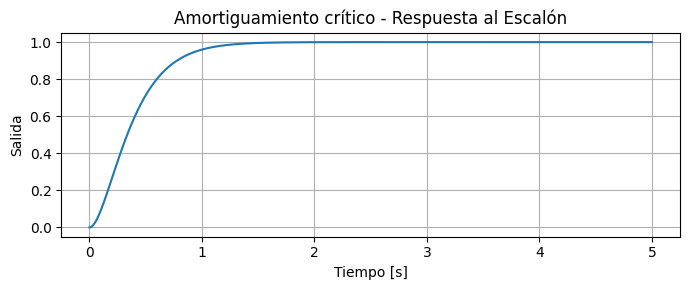

- tr: 0.671 s | Mp: -0.00% | tp: 5.000 s | ts: 1.171 s


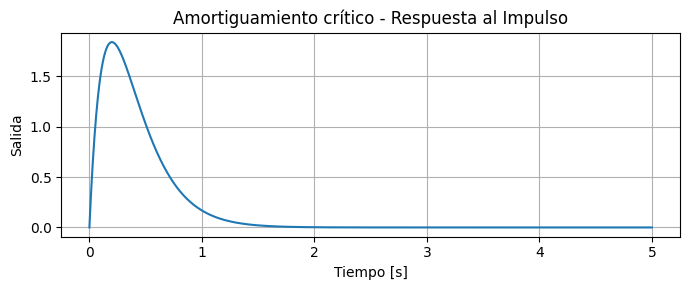

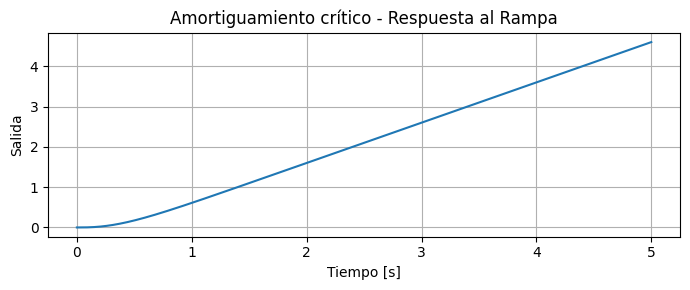


 Tipo: Sobreamortiguada | Œ∂ = 2.0


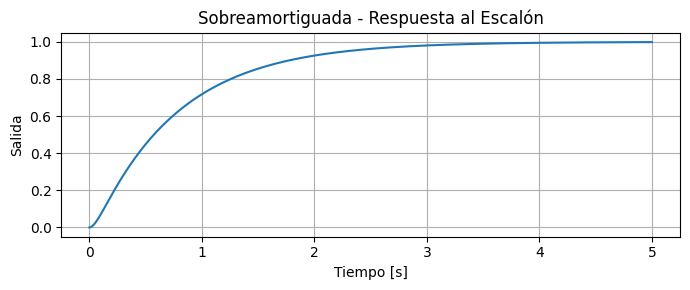

- tr: 1.647 s | Mp: -0.13% | tp: 5.000 s | ts: 2.978 s


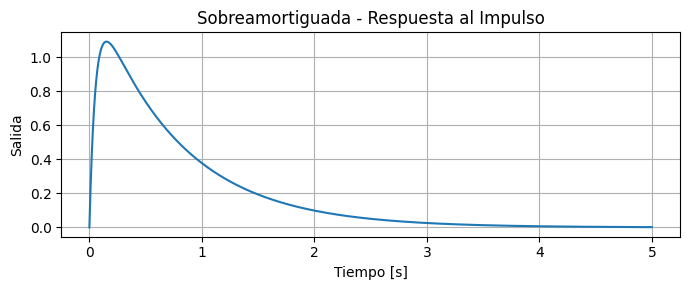

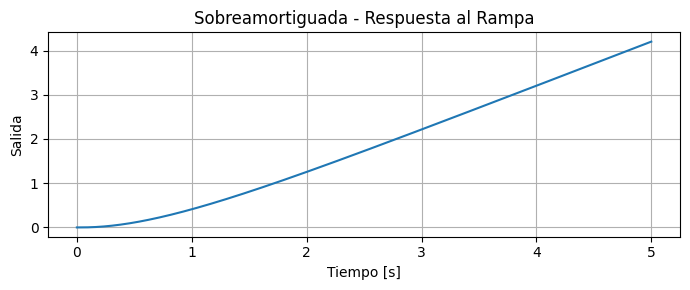


 Tipo: Inestable | Œ∂ = -1.0


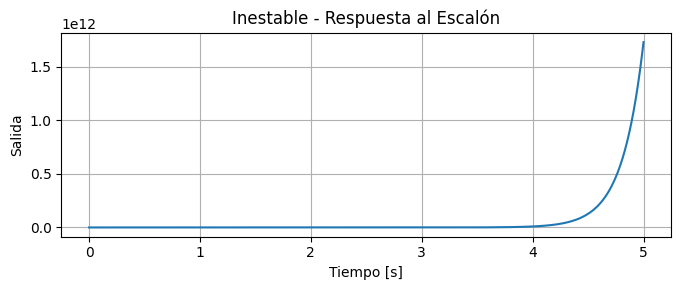

- tr: 0.115 s | Mp: 172811758409773.78% | tp: 5.000 s | ts: 0.200 s


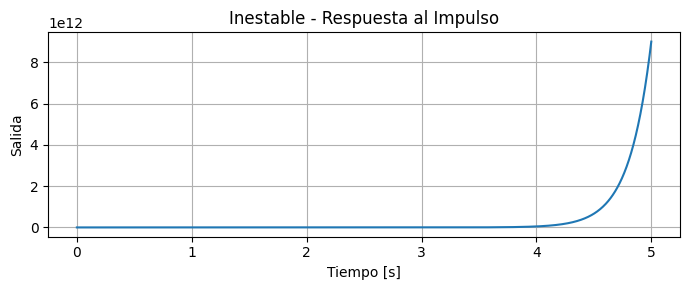

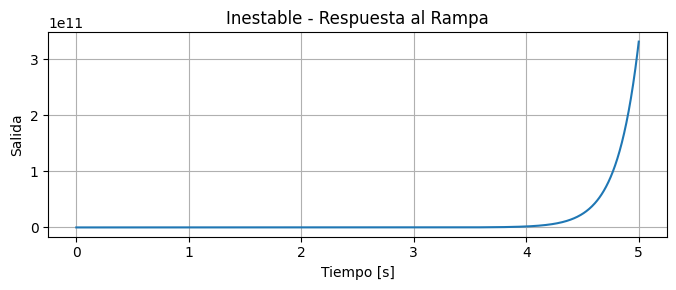

In [ ]:
# Diccionario con tipos de amortiguamiento y su coeficiente Œ∂ (zeta)
tipos = {
    "Subamortiguada": 0.5,
    "Amortiguamiento cr√≠tico": 1.0,
    "Sobreamortiguada": 2.0,
    "Inestable": -1.0
}

wn = 5  # Frecuencia natural
t = np.linspace(0, 5, 1000)  # Vector de tiempo

# Recorre cada tipo de sistema
for tipo, zeta in tipos.items():
    # Define la funci√≥n de transferencia de segundo orden
    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    sys = TransferFunction(num, den)

    print(f"\n Tipo: {tipo} | Œ∂ = {zeta}")

    # Respuesta para diferentes entradas
    for entrada in ["Escal√≥n", "Impulso", "Rampa"]:
        t_resp, y_resp = get_response(sys, t, entrada)

        # Graficar la respuesta
        plt.figure(figsize=(7, 3))
        plt.plot(t_resp, y_resp)
        plt.title(f"{tipo} - Respuesta al {entrada}")
        plt.xlabel("Tiempo [s]")
        plt.ylabel("Salida")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # Calcular y mostrar par√°metros si es escal√≥n
        if entrada == "Escal√≥n":
            tr, Mp, tp, ts = calc_parametros(t_resp, y_resp)
            print(f"- tr: {tr:.3f} s | Mp: {Mp:.2f}% | tp: {tp:.3f} s | ts: {ts:.3f} s")



 Tipo: Subamortiguada | Œ∂ = 0.5


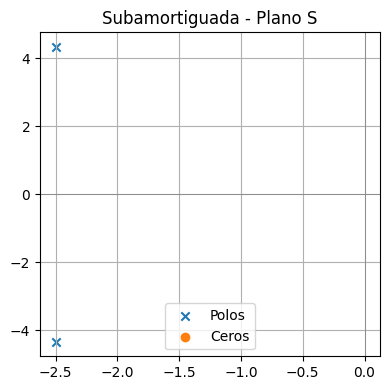

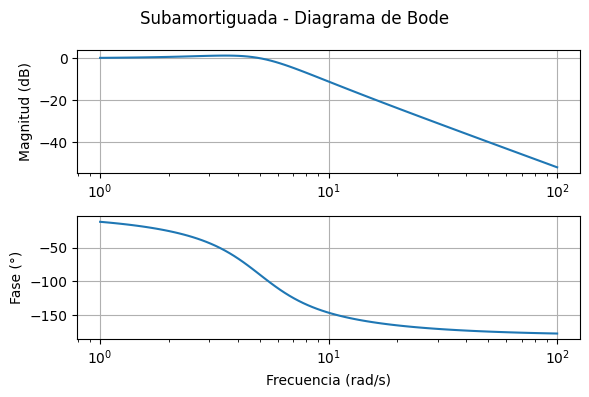


 Tipo: Amortiguamiento cr√≠tico | Œ∂ = 1.0


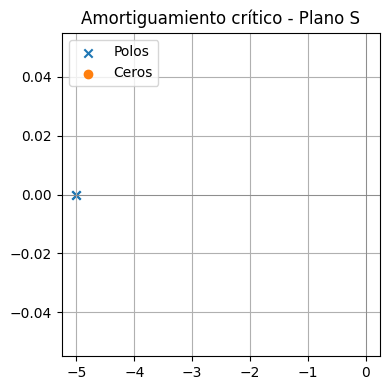

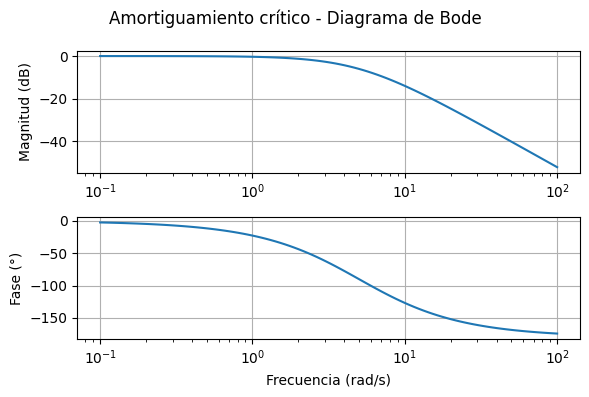


 Tipo: Sobreamortiguada | Œ∂ = 2.0


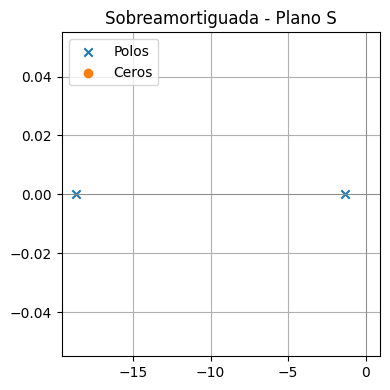

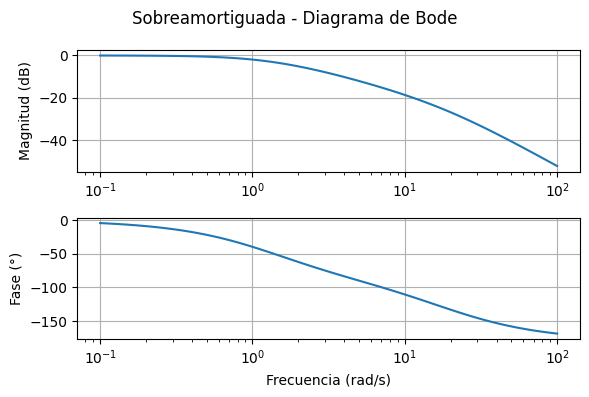


 Tipo: Inestable | Œ∂ = -1.0


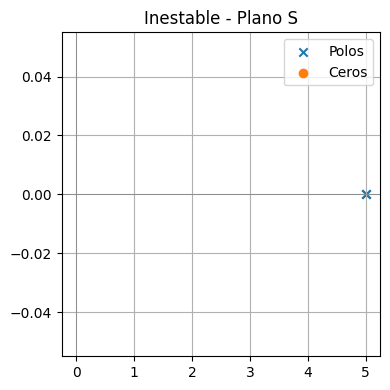

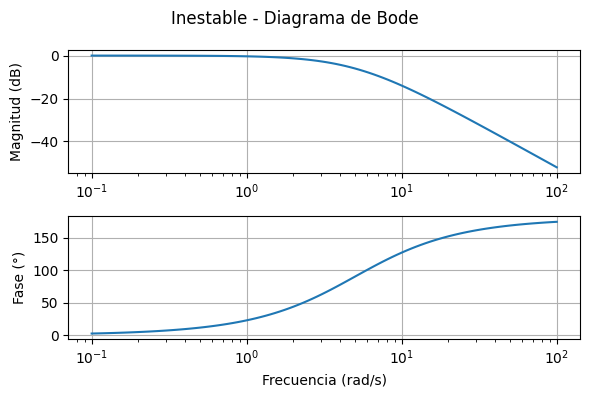

In [ ]:
# Recorre cada tipo de sistema con su coeficiente de amortiguamiento Œ∂
for tipo, zeta in tipos.items():
    # Funci√≥n de transferencia de segundo orden
    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    sys = TransferFunction(num, den)

    print(f"\n Tipo: {tipo} | Œ∂ = {zeta}")

    #  Plano S (Polos y ceros)
    z, p, _ = tf2zpk(num, den)
    plt.figure(figsize=(4, 4))
    plt.scatter(np.real(p), np.imag(p), marker='x', label='Polos')
    plt.scatter(np.real(z), np.imag(z), marker='o', label='Ceros')
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid(True)
    plt.title(f"{tipo} - Plano S")
    plt.legend()
    plt.tight_layout()
    plt.show()

    #  Diagrama de Bode
    w, mag, phase = bode(sys)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4))
    ax1.semilogx(w, mag)
    ax1.set_ylabel("Magnitud (dB)")
    ax1.grid(True)
    ax2.semilogx(w, phase)
    ax2.set_xlabel("Frecuencia (rad/s)")
    ax2.set_ylabel("Fase (¬∞)")
    ax2.grid(True)
    fig.suptitle(f"{tipo} - Diagrama de Bode", fontsize=12)
    fig.tight_layout()
    plt.show()


## Modelo f√≠sico equivalente

Para un sistema masa-resorte-amortiguador:

- Ecuaci√≥n diferencial: $ m\ddot{x} + c\dot{x} + kx = F(t) $
- Funci√≥n de transferencia:
  $$
  \frac{X(s)}{F(s)} = \frac{1}{ms^2 + cs + k}
  $$

Relaci√≥n con sistema el√©ctrico RLC:

- \( m \) ‚Üî \( L \)
- \( c \) ‚Üî \( R \)
- $ \frac{1}{k} $ ‚Üî \( C \)

Usamos \( m = 1 \) y obtenemos los par√°metros el√©ctricos equivalentes para cada tipo de sistema.


In [ ]:
m = 1
for tipo, zeta in tipos.items():
    k = wn**2 * m
    c = 2 * zeta * wn * m
    R, L, C = c, m, 1/k
    print(f"\n‚öôÔ∏è Tipo: {tipo}")
    print(f"- Masa: {m:.2f} kg | Resorte: {k:.2f} N/m | Amortiguador: {c:.2f} N¬∑s/m")
    print(f"- Equiv. RLC ‚Üí R: {R:.2f} Œ© | L: {L:.2f} H | C: {C:.5f} F")



‚öôÔ∏è Tipo: Subamortiguada
- Masa: 1.00 kg | Resorte: 25.00 N/m | Amortiguador: 5.00 N¬∑s/m
- Equiv. RLC ‚Üí R: 5.00 Œ© | L: 1.00 H | C: 0.04000 F

‚öôÔ∏è Tipo: Amortiguamiento cr√≠tico
- Masa: 1.00 kg | Resorte: 25.00 N/m | Amortiguador: 10.00 N¬∑s/m
- Equiv. RLC ‚Üí R: 10.00 Œ© | L: 1.00 H | C: 0.04000 F

‚öôÔ∏è Tipo: Sobreamortiguada
- Masa: 1.00 kg | Resorte: 25.00 N/m | Amortiguador: 20.00 N¬∑s/m
- Equiv. RLC ‚Üí R: 20.00 Œ© | L: 1.00 H | C: 0.04000 F

‚öôÔ∏è Tipo: Inestable
- Masa: 1.00 kg | Resorte: 25.00 N/m | Amortiguador: -10.00 N¬∑s/m
- Equiv. RLC ‚Üí R: -10.00 Œ© | L: 1.00 H | C: 0.04000 F


## Conclusiones

- Los sistemas de segundo orden presentan comportamientos din√°micos claramente diferenciables dependiendo del valor del factor de amortiguamiento $ \zeta $:
  - **Subamortiguado**: presenta oscilaciones antes de alcanzar el estado estacionario. Es t√≠pico en sistemas con buena respuesta r√°pida, como en controladores de posici√≥n.
  - **Amortiguamiento cr√≠tico**: es la condici√≥n √≥ptima para alcanzar el equilibrio en el menor tiempo sin sobrepasarse. Se considera ideal en sistemas donde se requiere velocidad sin sobreimpulso.
  - **Sobreamortiguado**: responde sin oscilaciones pero de manera m√°s lenta. √ötil cuando la estabilidad es prioritaria sobre la rapidez.
  - **Inestable**: muestra un crecimiento exponencial de la respuesta, indicando la imposibilidad de control sin correcci√≥n.

- A partir del modelo masa-resorte-amortiguador, se identific√≥ una **analog√≠a directa con sistemas el√©ctricos RLC**, lo que permite utilizar t√©cnicas del an√°lisis de circuitos para resolver problemas mec√°nicos.

- Se visualizaron las **respuestas al escal√≥n, impulso y rampa**, junto con el **plano de polos y ceros** y el **diagrama de Bode**, lo cual proporciona una comprensi√≥n integral de la din√°mica del sistema tanto en el dominio del tiempo como en el de la frecuencia.

- La implementaci√≥n en Python permiti√≥ observar gr√°ficamente el comportamiento din√°mico del sistema para diferentes configuraciones, fortaleciendo la comprensi√≥n de los efectos del amortiguamiento en la respuesta del sistema.

- Este an√°lisis es clave en ingenier√≠a de control, mec√°nica y electr√≥nica, ya que muchos sistemas f√≠sicos reales pueden modelarse como sistemas de segundo orden o aproximarse a ellos en sus primeras din√°micas.


# Punto 2 - Modulaci√≥n y Demodulaci√≥n SSB-AM (Banda Lateral √önica)



Este punto presenta el modelo matem√°tico de la modulaci√≥n y demodulaci√≥n por amplitud en banda lateral √∫nica (SSB-AM), utilizando la Transformada de Fourier para analizar el proceso en los dominios del tiempo y la frecuencia.

La modulaci√≥n SSB se basa en obtener la se√±al anal√≠tica $ m_a(t) = m(t) + j\hat{m}(t) $, cuya transformada de Fourier elimina las componentes negativas del espectro del mensaje. Luego, al modular con una portadora compleja, el espectro se desplaza, dejando solo una banda lateral (USB o LSB).

La demodulaci√≥n se realiza multiplicando la se√±al modulada por la portadora original (detecci√≥n coherente) y aplicando un filtro pasa bajos que recupera la se√±al base. En frecuencia, esto equivale a desplazar nuevamente el espectro a su posici√≥n original y filtrar las frecuencias no deseadas.

Este modelo permite una transmisi√≥n m√°s eficiente, con menor uso de ancho de banda y eliminaci√≥n de redundancias espectrales.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, butter, lfilter
from scipy.fft import fft, fftfreq


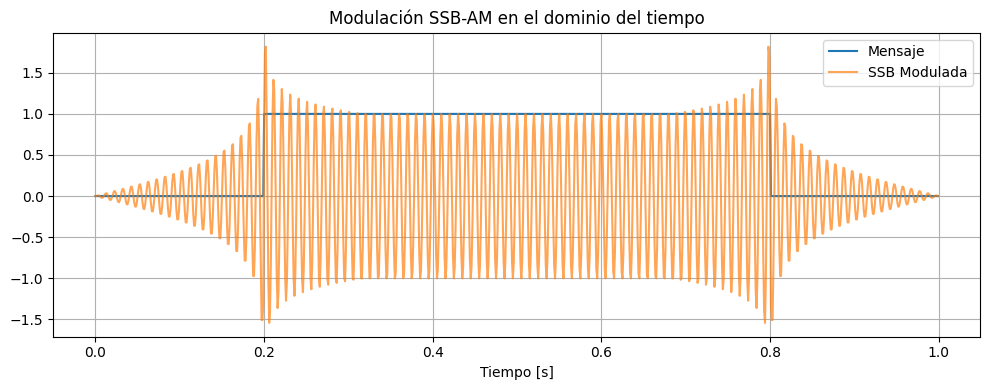

In [ ]:
# Par√°metros
fs = 1000  # Frecuencia de muestreo
T = 1.0    # Duraci√≥n (s)
t = np.linspace(0, T, int(fs*T), endpoint=False)
fc = 100   # Frecuencia de portadora

# Se√±al mensaje: pulso rectangular
mensaje = np.where((t >= 0.2) & (t <= 0.8), 1.0, 0.0)

# Transformada de Hilbert
mensaje_analitica = hilbert(mensaje)

# Se√±al modulada SSB
ssb = np.real(mensaje_analitica * np.exp(1j * 2 * np.pi * fc * t))

# Visualizaci√≥n
plt.figure(figsize=(10, 4))
plt.plot(t, mensaje, label='Mensaje')
plt.plot(t, ssb, label='SSB Modulada', alpha=0.7)
plt.title("Modulaci√≥n SSB-AM en el dominio del tiempo")
plt.xlabel("Tiempo [s]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Modelo matem√°tico ‚Äì Dominio de la frecuencia

Sea \( M(f) \) la Transformada de Fourier de la se√±al \( m(t) \). La modulaci√≥n DSB genera dos bandas laterales:

$$
S_{DSB}(f) = \frac{1}{2} [M(f - f_c) + M(f + f_c)]
$$

La modulaci√≥n SSB elimina una de las bandas laterales usando la transformada de Hilbert:

$$
S_{SSB}(f) = M(f - f_c) \quad \text{(para BLU)} \quad \text{o} \quad M(f + f_c) \quad \text{(para BLD)}
$$

Esto se logra en la pr√°ctica multiplicando la se√±al anal√≠tica por una exponencial compleja.


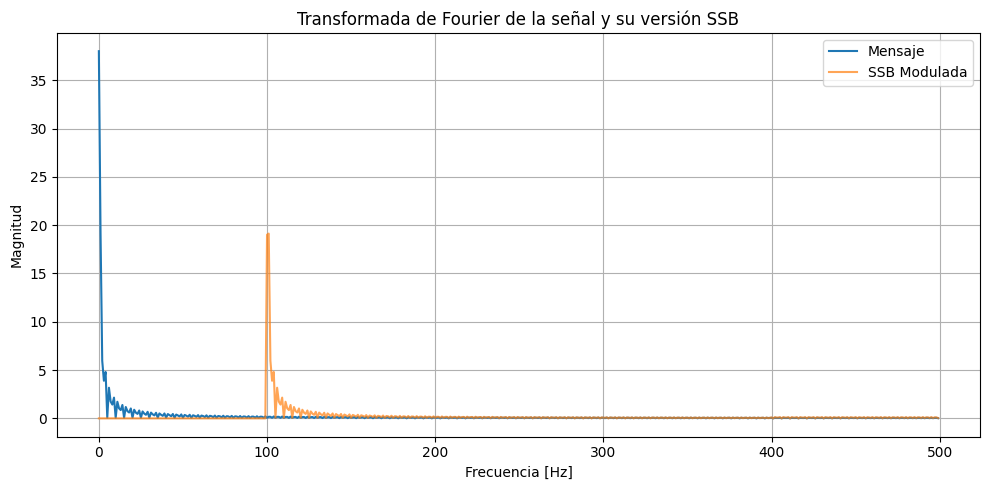

In [ ]:
def espectro(x, fs):
    N = len(x)
    f = fftfreq(N, d=1/fs)
    X = fft(x)
    return f[:N//2], 2/np.sqrt(N) * np.abs(X[:N//2])

f1, M = espectro(mensaje, fs)
f2, SSB = espectro(ssb, fs)

plt.figure(figsize=(10, 5))
plt.plot(f1, M, label="Mensaje")
plt.plot(f2, SSB, label="SSB Modulada", alpha=0.7)
plt.title("Transformada de Fourier de la se√±al y su versi√≥n SSB")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


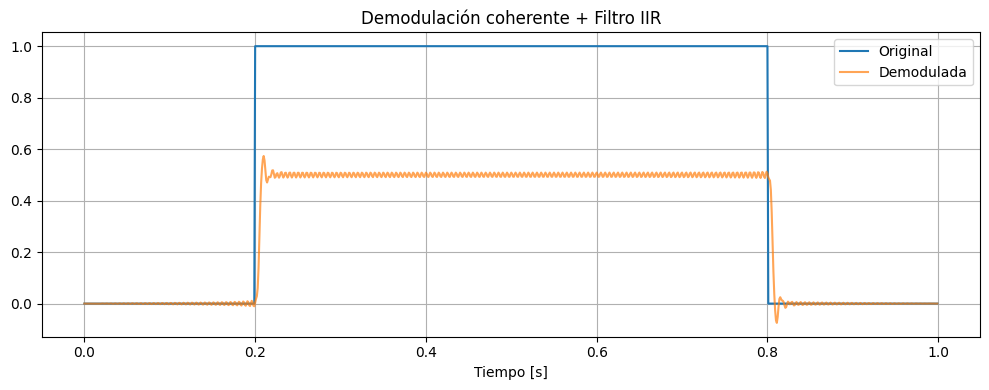

In [ ]:
# Demodulaci√≥n coherente
producto = ssb * np.cos(2 * np.pi * fc * t)

# Filtro IIR pasa bajas
def filtro_iir_pasabajo(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    from scipy.signal import butter
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def aplicar_filtro(x, b, a):
    return lfilter(b, a, x)

b, a = filtro_iir_pasabajo(fc, fs)
demodulada = aplicar_filtro(producto, b, a)

# Mostrar se√±al demodulada
plt.figure(figsize=(10, 4))
plt.plot(t, mensaje, label="Original")
plt.plot(t, demodulada, label="Demodulada", alpha=0.7)
plt.title("Demodulaci√≥n coherente + Filtro IIR")
plt.xlabel("Tiempo [s]")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Conclusiones

- Se present√≥ el modelo matem√°tico del proceso de modulaci√≥n y demodulaci√≥n SSB-AM.
- En el dominio del tiempo, se us√≥ la transformada de Hilbert para construir la se√±al anal√≠tica.
- En el dominio de la frecuencia, se analizaron las bandas laterales usando la Transformada de Fourier.
- Se implement√≥ la modulaci√≥n SSB y la demodulaci√≥n coherente, incluyendo el uso de filtros digitales IIR.
- El resultado demuestra c√≥mo se puede recuperar la se√±al original tras eliminar una banda lateral, ahorrando ancho de banda.


# **DASHBOARD**

In [ ]:
!pip install streamlit pyngrok --quiet


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.1/10.1 MB 47.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.9/6.9 MB 62.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.1/79.1 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Paso 2: Agrega tu authtoken de ngrok (solo una vez)
!ngrok config add-authtoken 2zZfdnAvX6tUJI08cN8hhSWdY4H_7E2PJuqohADwomd8ERAiL


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install streamlit
!pip install pyngrok
!pip install soundfile


In [ ]:
pip install streamlit matplotlib scipy soundfile yt-dlp


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 174.3/174.3 kB 3.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.3/3.3 MB 39.5 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step, impulse, tf2zpk, bode, lsim
from scipy.signal import butter, lfilter, freqz, hilbert
from scipy.fftpack import fft, fftfreq
import soundfile as sf
import io

# CONFIGURACI√ìN GENERAL
st.set_page_config(page_title="Parcial 2 - Evelin Mayerlin Giraldo Obando", layout="wide")
st.title("üß™ Parcial 2 - Se√±ales y Sistemas")
st.caption("Estudiante: Evelin Mayerlin Giraldo Obando")

# MEN√ö LATERAL
st.sidebar.title("üìö Men√∫ de Puntos")
punto = st.sidebar.radio("Selecciona el punto a resolver:", [
    "P√°gina principal",
    "Punto 1: Simulaci√≥n de sistemas",
    "Punto 2: Modulaci√≥n SSB-AM"
])

# P√ÅGINA PRINCIPAL
if punto == "P√°gina principal":
    st.subheader("üìÑ P√°gina principal")
    st.markdown("""
    Este panel contiene el desarrollo del **Parcial 2** de la asignatura **Se√±ales y Sistemas**.

    Se presentan dos puntos:

    - **Punto 1**: Simulaci√≥n de sistemas de segundo orden, con an√°lisis en lazo abierto y cerrado.
    - **Punto 2**: Modelado e implementaci√≥n del sistema de modulaci√≥n y demodulaci√≥n SSB-AM (Single Side Band Amplitude Modulation), usando se√±ales sint√©ticas y reales.

    Cada m√≥dulo contiene explicaciones detalladas, gr√°ficos interactivos y par√°metros claves del sistema.
    """)

# PUNTO 1
elif punto == "Punto 1: Simulaci√≥n de sistemas":
    st.header("üîπ Punto 1: Simulaci√≥n de sistemas de segundo orden")

    st.markdown("""
    Este m√≥dulo simula la respuesta de sistemas din√°micos de **segundo orden**, como los encontrados en modelos mec√°nicos masa-resorte-amortiguador o circuitos RLC.

    #### üß† Modelo Matem√°tico

    La ecuaci√≥n diferencial general de un sistema masa-resorte-amortiguador es:

    $$
    m \\ddot{x}(t) + c \\dot{x}(t) + k x(t) = F(t)
    $$

    Aplicando la transformada de Laplace:

    $$
    H(s) = \\frac{X(s)}{F(s)} = \\frac{1}{m s^2 + c s + k}
    $$

    O normalizado:

    $$
    H(s) = \\frac{\\omega_n^2}{s^2 + 2 \\zeta \\omega_n s + \\omega_n^2}
    $$

    Tambi√©n se simula el comportamiento en **lazo cerrado** con retroalimentaci√≥n unitaria.

    Se muestran:

    - Respuestas temporales
    - Diagramas de polos-ceros
    - Diagrama de Bode
    - Par√°metros din√°micos
    - Modelos equivalentes mec√°nico y el√©ctrico
    """)

    tipo = st.selectbox("Selecciona el tipo de respuesta:", ["Subamortiguada", "Amortiguamiento cr√≠tico", "Sobreamortiguada", "Inestable"])

    if tipo == "Subamortiguada":
        zeta = st.slider("Œ∂ (factor de amortiguamiento)", 0.01, 0.99, 0.5)
    elif tipo == "Amortiguamiento cr√≠tico":
        zeta = 1.0
        st.info("Amortiguamiento cr√≠tico (Œ∂ = 1)")
    elif tipo == "Sobreamortiguada":
        zeta = st.slider("Œ∂ (factor de amortiguamiento)", 1.01, 5.0, 2.0)
    else:
        zeta = st.slider("Œ∂ (factor de amortiguamiento negativo)", -5.0, -0.01, -1.0)

    wn = st.slider("œâ‚Çô (frecuencia natural en rad/s)", 0.1, 20.0, 5.0)

    num = [wn**2]
    den = [1, 2*zeta*wn, wn**2]
    s_open = TransferFunction(num, den)
    s_closed = TransferFunction(num, np.polyadd(den, num))
    t = np.linspace(0, 5, 1000)

    def get_response(sys, t, entrada):
        if entrada == "Escal√≥n":
            return step(sys, T=t)
        elif entrada == "Impulso":
            return impulse(sys, T=t)
        elif entrada == "Rampa":
            u = t
            _, y, _ = lsim(sys, U=u, T=t)
            return t, y

    def calc_parametros(t, y):
        try:
            tr = t[np.where(y >= 0.9)[0][0]] - t[np.where(y >= 0.1)[0][0]]
        except:
            tr = np.nan
        try:
            ts = t[np.where(np.abs(y - 1) < 0.02)[0][0]]
        except:
            ts = np.nan
        tp = t[np.argmax(y)]
        Mp = (np.max(y) - 1) * 100
        return tr, Mp, tp, ts

    tabs = st.tabs(["üìà Respuestas", "üìä Polos y Bode", "üìê Par√°metros", "‚öôÔ∏è Componentes"])

    with tabs[0]:
        for entrada in ["Escal√≥n", "Impulso", "Rampa"]:
            st.markdown(f"**{entrada}**")
            col = st.columns([1, 2, 1])[1]
            with col:
                fig, ax = plt.subplots(figsize=(5, 3.5))
                t_o, y_o = get_response(s_open, t, entrada)
                t_c, y_c = get_response(s_closed, t, entrada)
                ax.plot(t_o, y_o, label="Lazo Abierto")
                ax.plot(t_c, y_c, label="Lazo Cerrado", linestyle="--")
                ax.set_xlabel("Tiempo (s)")
                ax.set_ylabel("Respuesta")
                ax.grid(True)
                ax.legend()
                fig.tight_layout()
                st.pyplot(fig)

    with tabs[1]:
        z, p, _ = tf2zpk(num, den)
        col = st.columns([1, 2, 1])[1]
        with col:
            fig, ax = plt.subplots(figsize=(5, 3.5))
            ax.scatter(np.real(p), np.imag(p), marker='x', label='Polos')
            ax.scatter(np.real(z), np.imag(z), marker='o', label='Ceros')
            ax.axhline(0, color='gray', lw=0.5)
            ax.axvline(0, color='gray', lw=0.5)
            ax.set_title("Plano S")
            ax.grid(True)
            ax.legend()
            fig.tight_layout()
            st.pyplot(fig)

        w, mag, phase = bode(s_open)
        col = st.columns([1, 2, 1])[1]
        with col:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 4))
            ax1.semilogx(w, mag)
            ax1.set_ylabel("Magnitud (dB)")
            ax1.grid(True)
            ax2.semilogx(w, phase)
            ax2.set_xlabel("Frecuencia (rad/s)")
            ax2.set_ylabel("Fase (¬∞)")
            ax2.grid(True)
            fig.tight_layout()
            st.pyplot(fig)

    with tabs[2]:
        _, y = step(s_closed, T=t)
        tr, Mp, tp, ts = calc_parametros(t, y)
        st.write(f"- Tiempo de levantamiento (10‚Äì90%): **{tr:.3f} s**")
        st.write(f"- Sobreimpulso m√°ximo: **{Mp:.2f} %**")
        st.write(f"- Tiempo al pico: **{tp:.3f} s**")
        st.write(f"- Tiempo de establecimiento: **{ts:.3f} s**")

    with tabs[3]:
        m = 1
        k = wn**2 * m
        c = 2 * zeta * wn * m
        R, L, C = c, m, 1/k
        st.markdown("**Sistema mec√°nico equivalente:**")
        st.write(f"- Masa (m): {m:.2f} kg")
        st.write(f"- Resorte (k): {k:.2f} N/m")
        st.write(f"- Amortiguador (c): {c:.2f} N¬∑s/m")
        st.markdown("**Circuito el√©ctrico equivalente:**")
        st.write(f"- Resistencia (R): {R:.2f} Œ©")
        st.write(f"- Inductancia (L): {L:.2f} H")
        st.write(f"- Capacitancia (C): {C:.5f} F")

# PUNTO 2
elif punto == "Punto 2: Modulaci√≥n SSB-AM":
    st.header("üì° Punto 2: Modulaci√≥n y Demodulaci√≥n SSB-AM")
    st.markdown("""
    Este m√≥dulo permite modelar y analizar el proceso de **modulaci√≥n y demodulaci√≥n por amplitud en banda lateral √∫nica (SSB-AM)** usando se√±ales sint√©ticas y reales.

    ### üß† Modelo Matem√°tico

    Dominio del tiempo:
    $$
    s_{SSB}(t) = \\Re\\left\\{ \\left[ m(t) + j \\hat{m}(t) \\right] e^{j2\\pi f_c t} \\right\\}
    $$

    Dominio de la frecuencia:
    $$
    M_a(f) = 2U(f)M(f)
    $$

    El sistema incluye:
    - Transformada de Hilbert (para se√±al anal√≠tica)
    - Modulaci√≥n con portadora
    - Demodulaci√≥n coherente
    - Filtro IIR para reconstrucci√≥n

    Se visualizan las se√±ales en tiempo, frecuencia, y el comportamiento del filtro.
    """)

    tipo_senal = st.selectbox("Tipo de se√±al mensaje:", ["Pulso rectangular", "Fragmento de canci√≥n"])
    fs = 1000
    T = 1.0
    f_portadora = st.slider("Frecuencia de portadora [Hz]", 50, 300, 100)

    def obtener_fft(x, fs):
        N = len(x)
        X = fft(x)
        f = fftfreq(N, 1/fs)
        return f[:N//2], 2/np.sqrt(N) * np.abs(X[:N//2])

    def filtro_pasa_bajo(cutoff, fs, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return np.array(b, dtype=np.float64), np.array(a, dtype=np.float64)

    def aplicar_filtro(data, b, a):
        return lfilter(b, a, data)

    if tipo_senal == "Pulso rectangular":
        t = np.linspace(0, T, int(fs*T), endpoint=False)
        mensaje = np.where((t >= 0.2) & (t <= 0.8), 1.0, 0.0)
        st.markdown("### üü© Se√±al mensaje: Pulso rectangular")

    elif tipo_senal == "Fragmento de canci√≥n":
        archivo = st.file_uploader("Sube un archivo WAV", type=["wav"])
        if archivo is not None:
            mensaje, fs = sf.read(io.BytesIO(archivo.read()))
            mensaje = mensaje[:int(fs*5)]
            if mensaje.ndim > 1:
                mensaje = mensaje[:, 0]  # Mono
            t = np.linspace(0, len(mensaje)/fs, len(mensaje), endpoint=False)
            st.markdown("### üéµ Se√±al mensaje: Fragmento de canci√≥n")
        else:
            st.warning("Por favor sube un archivo WAV.")
            st.stop()

    analitica = hilbert(mensaje)
    ssb = np.real(analitica * np.exp(1j*2*np.pi*f_portadora*t))
    producto = ssb * np.cos(2*np.pi*f_portadora*t)
    b, a = filtro_pasa_bajo(f_portadora, fs)
    demodulada = aplicar_filtro(producto, b, a)

    tabs = st.tabs(["üïí Tiempo", "üîä Frecuencia", "üîÅ Etapas", "üìâ Bode y Polos"])

    with tabs[0]:
        col = st.columns([1, 2, 1])[1]
        with col:
            fig, ax = plt.subplots(3, 1, figsize=(6, 5))
            ax[0].plot(t, mensaje)
            ax[0].set_title("Mensaje")
            ax[1].plot(t, ssb)
            ax[1].set_title("Modulada SSB")
            ax[2].plot(t, demodulada)
            ax[2].set_title("Demodulada")
            for a_ in ax: a_.grid(True)
            fig.tight_layout()
            st.pyplot(fig)

    with tabs[1]:
        f1, M = obtener_fft(mensaje, fs)
        f2, S = obtener_fft(ssb, fs)
        f3, D = obtener_fft(demodulada, fs)
        col = st.columns([1, 2, 1])[1]
        with col:
            fig, ax = plt.subplots(3, 1, figsize=(6, 5))
            ax[0].plot(f1, M)
            ax[0].set_title("Mensaje - Frecuencia")
            ax[1].plot(f2, S)
            ax[1].set_title("SSB Modulada - Frecuencia")
            ax[2].plot(f3, D)
            ax[2].set_title("Demodulada - Frecuencia")
            for a_ in ax: a_.grid(True)
            fig.tight_layout()
            st.pyplot(fig)

    with tabs[2]:
        st.markdown("""
        - **Mensaje**: se√±al original.
        - **Se√±al anal√≠tica**: por transformada de Hilbert.
        - **Modulaci√≥n SSB**: se aplica portadora compleja.
        - **Demodulaci√≥n**: multiplicaci√≥n coherente y filtrado.
        """)

    with tabs[3]:
        w, h = freqz(b, a, fs=fs)
        col = st.columns([1, 2, 1])[1]
        with col:
            fig1, ax1 = plt.subplots(figsize=(5, 3))
            ax1.plot(w, 20 * np.log10(np.abs(h)))
            ax1.set_title("Diagrama de Bode")
            ax1.set_ylabel("Magnitud (dB)")
            ax1.set_xlabel("Frecuencia (Hz)")
            ax1.grid(True)
            fig1.tight_layout()
            st.pyplot(fig1)

        col = st.columns([1, 2, 1])[1]
        with col:
            z, p, _ = tf2zpk(b, a)
            fig2, ax2 = plt.subplots(figsize=(4, 4))
            ax2.scatter(np.real(p), np.imag(p), marker='x', label='Polos')
            ax2.scatter(np.real(z), np.imag(z), marker='o', label='Ceros')
            ax2.axhline(0, color='gray', lw=0.5)
            ax2.axvline(0, color='gray', lw=0.5)
            ax2.set_title("Plano Polos y Ceros")
            ax2.grid(True)
            ax2.legend()
            fig2.tight_layout()
            st.pyplot(fig2)


Overwriting app.py


In [ ]:
# Paso 4: Ejecutar streamlit y abrir con ngrok
from pyngrok import ngrok
!streamlit run app.py &> /dev/null &
url = ngrok.connect(8501)
print("üîó Haz clic aqu√≠ para abrir el dashboard:", url)


üîó Haz clic aqu√≠ para abrir el dashboard: NgrokTunnel: "https://e4e6030089b6.ngrok-free.app" -> "http://localhost:8501"
